Wrap-Up Script for Module 2: [Selecting the best model](https://inria.github.io/scikit-learn-mooc/overfit/overfit_wrap_up_quiz.html)

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")  # adjust path if needed
target_name = "Class"
X = blood_transfusion.drop(columns=target_name)
y = blood_transfusion[target_name]

blood_transfusion.head()


,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


In [2]:
print("unique classes:", y.unique())
counts = y.value_counts()
print("\nclass counts:\n", counts)

ratio = counts.max() / counts.min()
print("\nmax/min ratio:", ratio)
print("imbalanced (max > 2*min)?", ratio > 2)


unique classes: ['donated' 'not donated']

class counts:
 Class
not donated    570
donated        178
Name: count, dtype: int64

max/min ratio: 3.202247191011236
imbalanced (max > 2*min)? True


In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy = DummyClassifier(strategy="most_frequent", random_state=0)
scores = cross_val_score(dummy, X, y, cv=10, scoring="accuracy")
scores.mean(), scores.std()
print("Accuracy: %.3f +/- %.3f" % (scores.mean(), scores.std()))


Accuracy: 0.762 +/- 0.004


In [6]:
scores = cross_val_score(dummy, X, y, cv=10, scoring="balanced_accuracy")
scores.mean(), scores.std()
print("Balanced Accuracy: %.3f +/- %.3f" % (scores.mean(), scores.std()))


Balanced Accuracy: 0.500 +/- 0.000


In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(StandardScaler(), KNeighborsClassifier())
model


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('kneighborsclassifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thena

In [8]:
model.get_params()["kneighborsclassifier__n_neighbors"]


5

In [11]:
from sklearn.model_selection import cross_validate

model_1nn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

cv_res = cross_validate(
    model_1nn, X, y,
    cv=10,
    scoring="balanced_accuracy",
    return_train_score=True,
)

cv_res["train_score"].mean(), cv_res["test_score"].mean()
print("Is there underfitting, overfitting, or good fit?")
print("Train Balanced Accuracy: %.3f" % cv_res["train_score"].mean())
print("Test Balanced Accuracy: %.3f" % cv_res["test_score"].mean())

if cv_res["train_score"].mean() < 0.6:
    print("Underfitting")
elif cv_res["train_score"].mean() - cv_res["test_score"].mean() > 0.1:
    print("Overfitting")
else:
    print("Good fit")


Is there underfitting, overfitting, or good fit?
Train Balanced Accuracy: 0.883
Test Balanced Accuracy: 0.484
Overfitting


In [12]:
import numpy as np
from sklearn.model_selection import validation_curve

param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])
param_name = "kneighborsclassifier__n_neighbors"

train_scores, test_scores = validation_curve(
    model, X, y,
    param_name=param_name,
    param_range=param_range,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
gap = train_mean - test_mean

import pandas as pd
summary = pd.DataFrame({
    "n_neighbors": param_range,
    "train_bal_acc": train_mean,
    "test_bal_acc": test_mean,
    "gap(train-test)": gap
})
summary


,n_neighbors,train_bal_acc,test_bal_acc,gap(train-test)
0,1,0.889903,0.489612,0.400292
1,2,0.841787,0.500664,0.341123
2,5,0.710427,0.514641,0.195786
3,10,0.697481,0.554286,0.143195
4,20,0.678223,0.600789,0.077434
5,50,0.624069,0.568363,0.055707
6,100,0.535553,0.554369,-0.018816
7,200,0.500000,0.500000,0.000000
8,500,0.500000,0.500000,0.000000


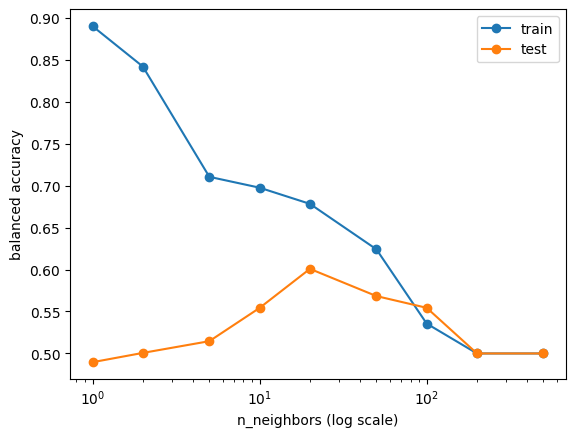

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(param_range, train_mean, marker="o", label="train")
plt.plot(param_range, test_mean, marker="o", label="test")
plt.xscale("log")
plt.xlabel("n_neighbors (log scale)")
plt.ylabel("balanced accuracy")
plt.legend()
plt.show()
